In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import text
from scipy.stats import wilcoxon

df = pd.read_pickle("fig3Edata.pickle")

In [3]:
def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "n.s."

def sigplot(ax,xpos,y_max,p_value,Fs = 12):
    y_min=0
    w=.3;

    ax.text(xpos, y_max + 0.015, stars(p_value),
           horizontalalignment='center',
           verticalalignment='center',fontsize=Fs)

baseline
training:  7.057E-01
baseline
training:  1.000E+00
A:  1.953E-02
A:  4.883E-02
PHC:  4.316E-01
PHC:  4.922E-01
EC:  3.906E-03
EC:  5.469E-02
H:  1.953E-03
H:  9.766E-04


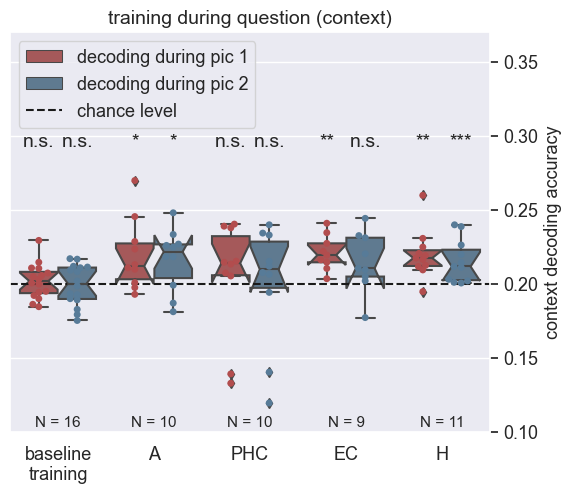

In [4]:
sitenames = ['A','PHC','EC','H'];

# 1. Text editable
Fs = 13
plt.rcParams['svg.fonttype'] = 'none'

# 2. Regular font for math/Greek
plt.rcParams['mathtext.default'] = 'regular'

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']


df = df.replace("BL","baseline\ntraining")

p = sns.color_palette("Set1", n_colors=8, desat=.5)

chance_level = .2

sns.set(style="darkgrid")
fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([.1,.1,.8,.8])

boxaxis = sns.boxplot(data=df, x="Site",y="decoding accuracy",
        hue="image",notch = True,dodge =True, ax=ax,order=["baseline\ntraining"]+sitenames, palette = p)
swarmaxis = sns.swarmplot(data=df, x="Site",y="decoding accuracy",
        hue="image",dodge =True, ax=ax,order=["baseline\ntraining"]+sitenames, palette = p)
chance_plot = plt.plot([-1,6],[chance_level,chance_level],'k--')

handles, _ = boxaxis.get_legend_handles_labels()
handles = handles[:2]
handles.append(chance_plot[0])
swarmaxis.set(xlabel='')

ax.legend(handles=handles,
          labels= ["decoding during pic 1","decoding during pic 2","chance level"],
          bbox_to_anchor=(.53,1),
          prop = {'size':13}) #'weight': 'bold',
    
plt.tick_params(labelsize=Fs)
plt.xticks(fontsize=Fs)
plt.ylabel('context decoding accuracy',fontname='Arial',fontsize=Fs)
plt.xlabel('',fontname='Arial',fontsize=Fs)
#plt.ylim([.175,.4])
plt.ylim([.1,.37])
plt.title('training during question (context)',fontsize=Fs+1) #(-context) or context 

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

y_offset = .281
for i,site in enumerate(["baseline\ntraining"]+sitenames):
    for ii,im in enumerate(["image 1","image 2"]):
        sel = (df["image"] == im) & (df["Site"] == site)
        pval = wilcoxon(df.loc[sel,"decoding accuracy"]-chance_level).pvalue#*6
        print(site + ": " + format(pval, "10.3E"))
        sigplot(ax,i+.2*((ii-.5)*2),y_offset,pval,Fs=14)

xlabels = ["baseline\ntraining"]+sitenames;
for i,x in enumerate(xlabels):
    new_N = np.sum(~np.isnan(df["decoding accuracy"][(df["Site"] == x) & (df["image"] == "image 1")]))
    #print({i:new_N})
    ax.text(i, .106, "N = {}".format(new_N),
           horizontalalignment='center',
           verticalalignment='center',fontsize=Fs-2)
